In [3]:
# Data Manipulation
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pandas import datetime

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Import the dataset
customerseg = pd.read_csv('Online Retail.csv')
customerseg.head()

/var/folders/z1/46h1y8g95pv0q0g9_2g_klbr0000gn/T/ipykernel_16301/1765452932.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


# EXPLORATORY DATA ANALYSIS

In [122]:
customerseg.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31/10/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [4]:
customerseg['InvoiceDate'] = pd.to_datetime(customerseg['InvoiceDate'])
customerseg['Year'] = customerseg['InvoiceDate'].apply(lambda x : x.year)
customerseg['Month'] = customerseg['InvoiceDate'].apply(lambda x : x.month)
customerseg.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1


In [124]:
customerseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Year         541909 non-null  int64         
 9   Month        541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 41.3+ MB


In [125]:
#Checking for negative values 
print(customerseg["Quantity"].min())
print(customerseg["UnitPrice"].min())

-80995
-11062.06


In [126]:
#Deleting return data
customerseg = customerseg.loc[customerseg["Quantity"] >0 ]
customerseg = customerseg.loc[customerseg["UnitPrice"] >0 ]
customerseg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011,9


In [127]:
print(customerseg["Quantity"].min())
print(customerseg["UnitPrice"].min())

1
0.001


In [128]:
databycountry

Country
United Kingdom    3916
EIRE              1968
Germany           1664
France            1542
Spain             1091
Switzerland        978
Netherlands        782
Belgium            777
Portugal           706
Australia          599
Name: StockCode, dtype: int64

In [129]:
invoicecount = customerseg['InvoiceNo'].value_counts()
invoicecount

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
574320       1
539081       1
574324       1
566009       1
570725       1
Name: InvoiceNo, Length: 19960, dtype: int64

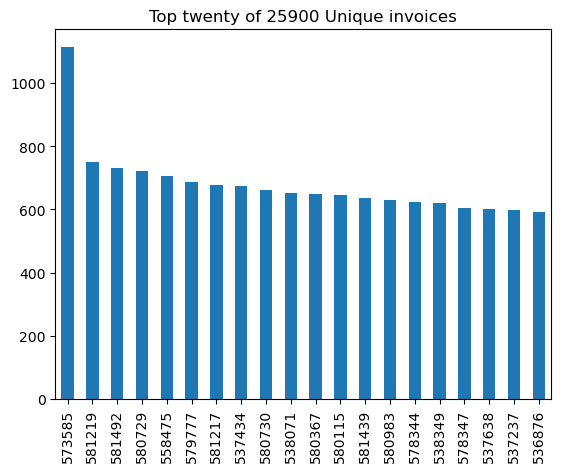

In [130]:
invoicecount[0:20].plot(kind = 'bar')
plt.title("Top twenty of 25900 Unique invoices")
plt.show()
#This shows that this guys may not have the highest number of orders but they are recurring(Meaning they ordered different products)

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


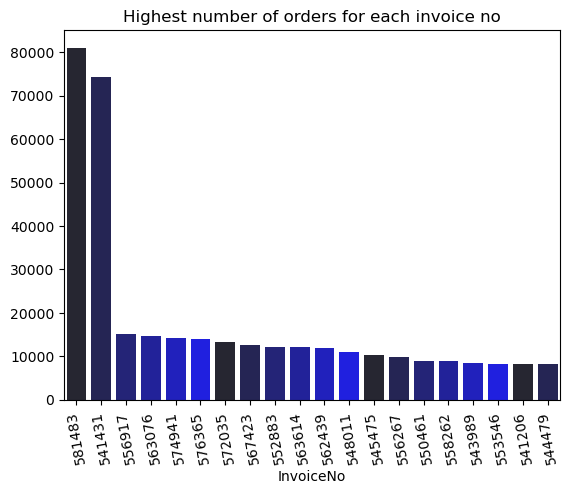

In [131]:
items = customerseg.groupby('InvoiceNo')['Quantity'].sum().sort_values(ascending = False)[:20]
sns.barplot(items.index, items.values, palette=sns.color_palette("dark:b"))
plt.title("Highest number of orders for each invoice no");
plt.xticks(rotation=100);
#Invoice numbers with the highest quantity ordered.

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


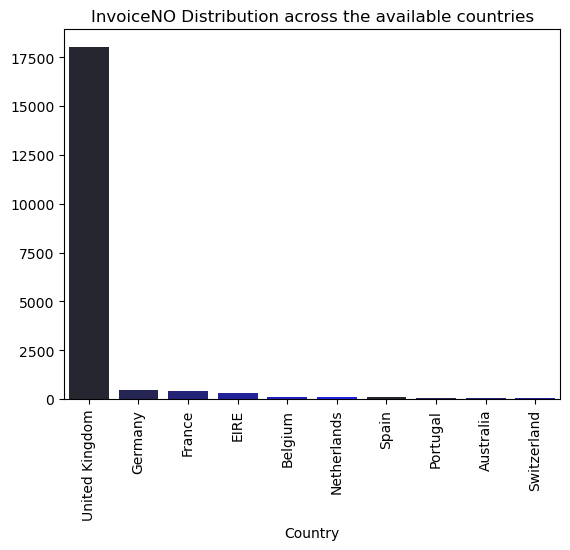

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
databycountry = customerseg.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False)[:10]
sns.barplot(databycountry.index, databycountry.values, palette=sns.color_palette("dark:b"))
plt.title("InvoiceNO Distribution across the available countries");
plt.xticks(rotation=90);
#Unique invoice numbers across the available countries

In [134]:
stockcodecount= customerseg['StockCode'].value_counts()
stockcodecount

85123A      2265
85099B      2112
22423       2017
47566       1706
20725       1595
            ... 
DCGS0004       1
84705C         1
20964          1
72803b         1
23843          1
Name: StockCode, Length: 3922, dtype: int64

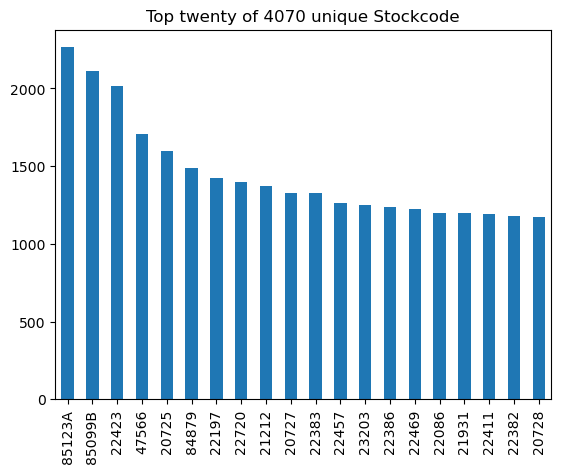

In [135]:
stockcodecount[0:20].plot(kind = 'bar')
plt.title("Top twenty of 4070 unique Stockcode")
plt.show()

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


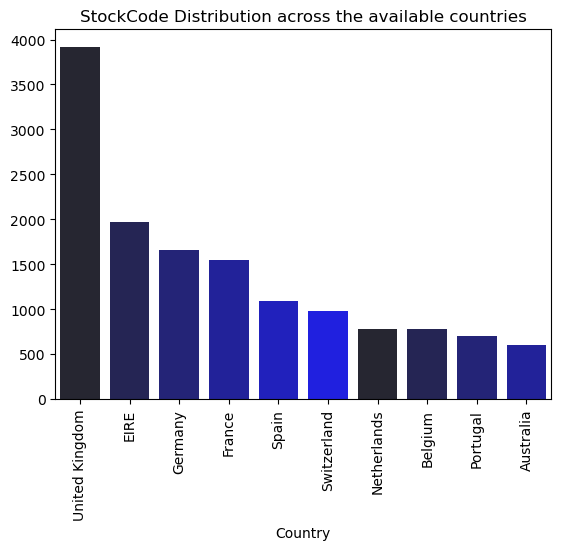

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
databycountry = customerseg.groupby('Country')['StockCode'].nunique().sort_values(ascending = False)[:10]
sns.barplot(databycountry.index, databycountry.values, palette=sns.color_palette("dark:b"))
plt.title("StockCode Distribution across the available countries");
plt.xticks(rotation=90);

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


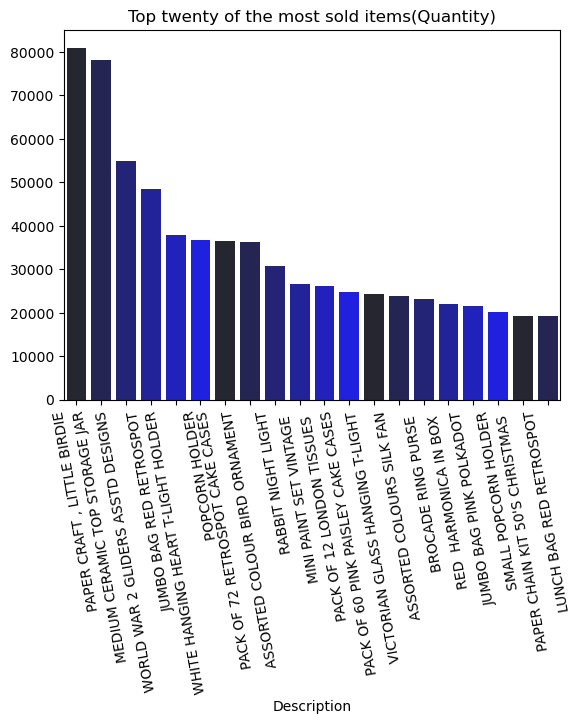

In [164]:
items = customerseg.groupby('Description')['Quantity'].sum().sort_values(ascending = False)[:20]
sns.barplot(items.index, items.values, palette=sns.color_palette("dark:b"))
plt.title("Top twenty of the most sold items(In terms of quantity)");
plt.xticks(rotation=100);

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


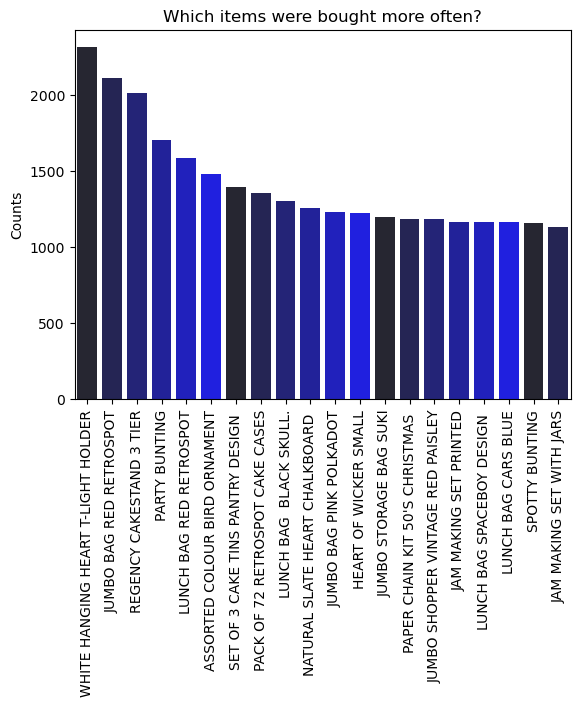

In [166]:
item_counts = customerseg['Description'].value_counts().sort_values(ascending=False).head(20)
sns.barplot(item_counts.index, item_counts.values,palette=sns.color_palette("dark:b"))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [5]:
customerseg['Sales'] = customerseg['Quantity'] * customerseg['UnitPrice']

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



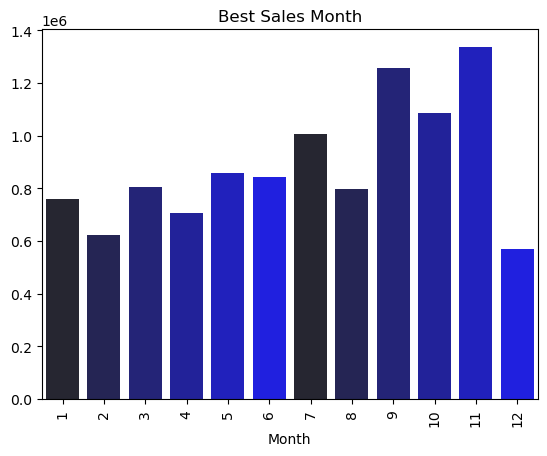

In [268]:
sales_per_month = customerseg[customerseg['Sales']>0].groupby('Month')['Sales'].sum().sort_values(ascending = False)
sns.barplot(sales_per_month.index, sales_per_month.values, palette=sns.color_palette("dark:b"))
plt.title("Best Sales Month");
plt.xticks(rotation=90);

           Country        Sales
36  United Kingdom  9001744.094
24     Netherlands   285446.340
10            EIRE   283140.520
14         Germany   228678.400
13          France   209625.370
0        Australia   138453.810
31           Spain    61558.560
33     Switzerland    57067.600
3          Belgium    41196.340
32          Sweden    38367.830
AxesSubplot(0.125,0.11;0.775x0.77)


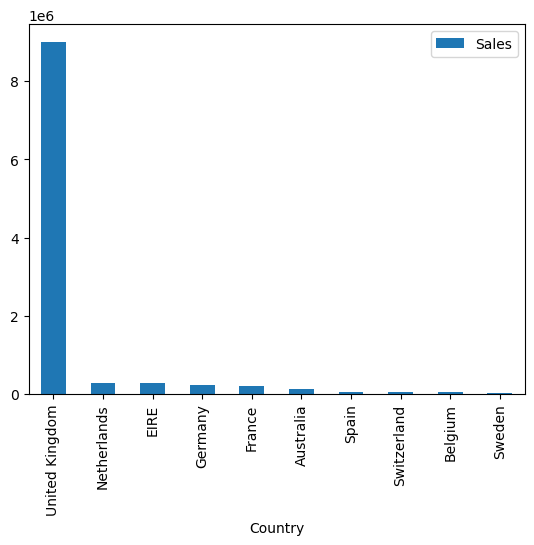

In [267]:
data_temp = customerseg.groupby(['Country'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False).head(10)
print(data_temp)
print(data_temp.plot(x='Country', y='Sales',kind='bar'))

Customer who spent the most

In [188]:
customerseg.groupby("InvoiceNo").agg({"Sales": "sum"}).sort_values(by = "Sales", ascending = False).head()

,Sales
InvoiceNo,
581483,168469.60
541431,77183.60
574941,52940.94
576365,50653.91
556444,38970.00


In [140]:
customerseg.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False,False,False,False


In [141]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      customerseg.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
Year                0
Month               0
Sales               0
dtype: int64


In [142]:
print(customerseg.duplicated().sum())

5226


In [ ]:
Technical Insights
Columns & Rows

As expected, there are 8 Columns (features/variables).
There are 541909 Rows.
Duplicate Values

There are 5268(1%) duplicate rows.

Must be removed before further analysis.

Our data shows majority of the purchases is made from the united kingdom
Germany, France, Ireland (EIRE), Spain, Netherlands follow UK in terms of the number of purchases.

On an Average November seems to be our best month early

Our most sold product is world war tow glider

InvoiceNo has a high cardinality: 25900 distinct values
StockCode has a high cardinality: 4070 distinct values
Description has a high cardinality: 4223 distinct values
InvoiceDate has a high cardinality: 23260 distinct values
    
Customer ID has 135080 missing values
Description has 1454 missing values

Dataset has a total of 5628 duplicate values which we need to drop to avoid wrong analysis

In [143]:
customerseg = customerseg.drop_duplicates()
customerseg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011,9,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011,9,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011,9,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011,9,16.60


What is the general sales trend

In [144]:

general_trend = customerseg.groupby("InvoiceDate")["Sales"].sum()
general_trend = pd.DataFrame(general_trend)
general_trend

,Sales
InvoiceDate,
2010-01-12 08:26:00,139.12
2010-01-12 08:28:00,22.20
2010-01-12 08:34:00,348.78
2010-01-12 08:35:00,17.85
2010-01-12 08:45:00,855.86
...,...
2011-12-10 15:49:00,263.61
2011-12-10 16:36:00,2110.05
2011-12-10 16:40:00,1901.92


In [145]:
dates = []
dates.append(pd.to_datetime("201012",format="%Y%m"))
dates += [pd.to_datetime("2011"+str(month),format="%Y%m") for month in range(1,12)]

In [148]:
general_trend_months

Sales
InvoiceDate InvoiceDate             
2010        1              58776.790
            2              47629.420
            3              46898.630
            5              31364.630
            6              54624.150
            7              99553.850
            8              45235.360
            9              53548.190
            10             59021.020
            12            324800.690
2011        1             700510.610
            2             575211.670
            3             756961.460
            4             706669.411
            5             824906.880
            6             786516.590
            7             905018.561
            8             753503.840
            9            1203625.302
            10           1027029.940
            11           1336139.480
            12            244564.330

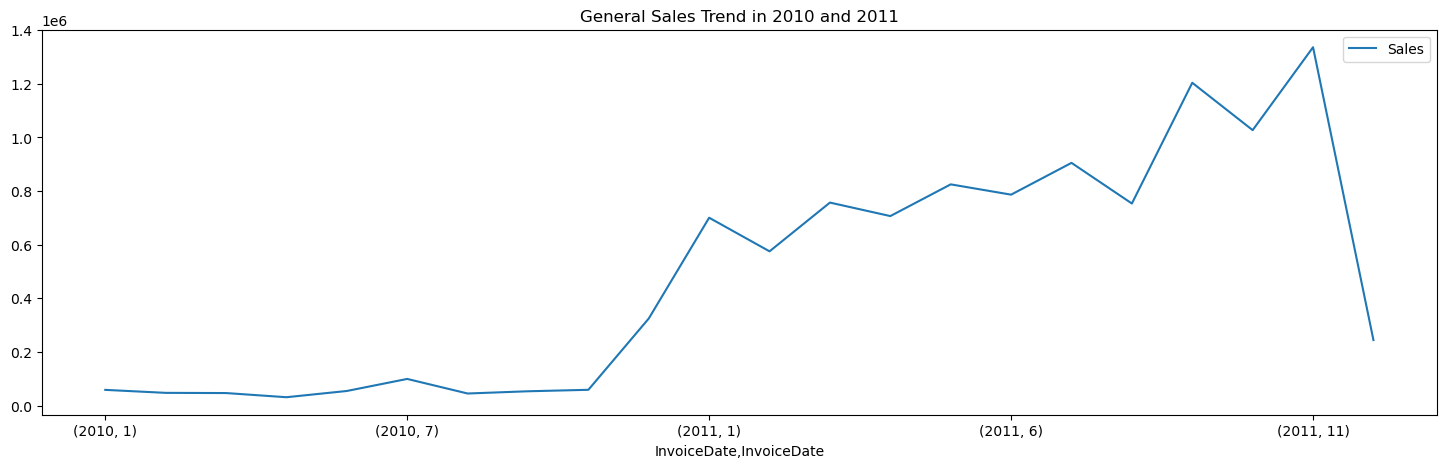

In [149]:
general_trend_months.plot(kind = 'line', figsize=(18,5))
plt.title("General Sales Trend in 2010 and 2011")
plt.show()

Best Selling Product for each Country

In [157]:
sum_total_price_products = pd.DataFrame(customerseg.groupby(["Country","Description"])["Sales"].sum())
best_selling_product = pd.DataFrame(data=sum_total_price_products.groupby(["Country"])['Sales'].idxmax().values.tolist(),columns =['Country', 'Best Selling Product'])

max_sales = sum_total_price_products.groupby("Country")["Sales"].max().values.tolist()
best_selling_product["MaxSales"] = max_sales

total_sales = sum_total_price_products.groupby("Country")["Sales"].sum().values.tolist() 
best_selling_product["Total sales"] = total_sales

best_selling_product["% of country sales"] = best_selling_product["MaxSales"]/best_selling_product["Total sales"]

In [158]:
best_selling_product \
.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True), \
 subset=["% of country sales"]) \
.format({"% of country sales":"{:.2%}",
         "Sales":"£{:,.0f}",
         "Country total sales":"£{:,.0f}"})

,Country,Best Selling Product,MaxSales,Total sales,% of country sales
0,Australia,RABBIT NIGHT LIGHT,3375.840000,138453.810000,2.44%
1,Austria,POSTAGE,1456.000000,10198.680000,14.28%
2,Bahrain,OCEAN SCENT CANDLE IN JEWELLED BOX,231.240000,754.140000,30.66%
3,Belgium,POSTAGE,4269.000000,41196.340000,10.36%
4,Brazil,REGENCY CAKESTAND 3 TIER,175.200000,1143.600000,15.32%
5,Canada,POSTAGE,550.940000,3666.380000,15.03%
6,Channel Islands,REGENCY CAKESTAND 3 TIER,517.800000,20440.540000,2.53%
7,Cyprus,RUSTIC SEVENTEEN DRAWER SIDEBOARD,580.000000,13502.850000,4.30%
8,Czech Republic,ROUND SNACK BOXES SET OF4 WOODLAND,70.800000,826.740000,8.56%
9,Denmark,POSTAGE,744.000000,18955.340000,3.93%


General sales for each months per country

In [160]:
general_trend_country = pd.DataFrame(data={'Date':pd.to_datetime(customerseg.InvoiceDate),
                                   'Country':customerseg.Country,
                                  'Total price':customerseg.Sales})
general_trend_country = general_trend_country.groupby([general_trend_country.Date.dt.to_period("M"),general_trend_country.Country]).sum()
general_trend_country = pd.DataFrame(general_trend_country).reset_index()

In [161]:
general_trend_country.groupby([general_trend_country.Country]).sum().sort_values(by='Total price',ascending=False).head(10)

,Total price
Country,
United Kingdom,9001744.094
Netherlands,285446.340
EIRE,283140.520
Germany,228678.400
France,209625.370
Australia,138453.810
Spain,61558.560
Switzerland,57067.600
Belgium,41196.340


In [162]:
general_trend_country.Date = general_trend_country.Date.dt.to_timestamp()

When do customers tend to purchase products?

In [167]:
df_temp = customerseg.groupby([customerseg.CustomerID,customerseg.InvoiceDate]).Quantity.sum()
df_temp = pd.DataFrame(df_temp).reset_index()

In [168]:
df_temp["Hour"]= df_temp["InvoiceDate"].dt.hour
df_temp["Month"]= df_temp["InvoiceDate"].dt.to_period('M')

In [169]:
count_hours = pd.DataFrame(columns=range(1,25))
count_hours["Month"] = ""

for month in sorted(df_temp["Month"].unique()):
    row = []
    for hour in range(1,25):
        freq = len(df_temp[(df_temp["Month"]==month)&(df_temp["Hour"]==hour)])
        row.append(float(freq))
    row.append(month)
    count_hours.loc[len(count_hours)] = row
         
count_hours = count_hours.set_index("Month") 

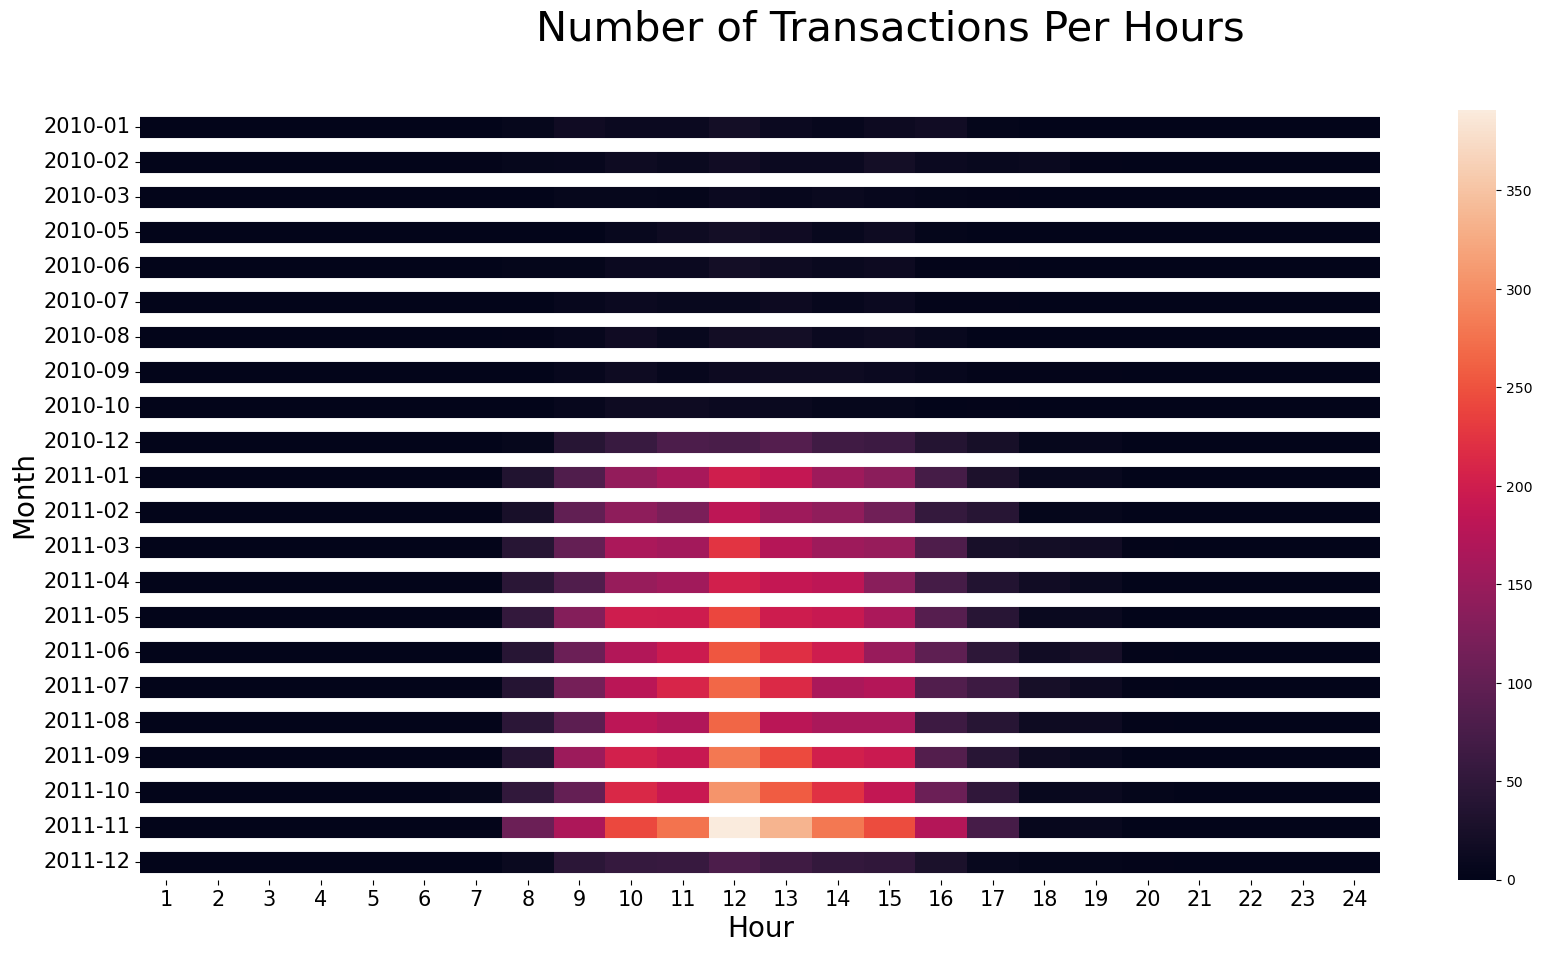

In [179]:
fig  = plt.figure(figsize = (20,10)).suptitle('Number of Transactions Per Hours', fontsize=30)
heatmap = sns.heatmap(data=count_hours)
plt.yticks(rotation=0,size=15)
plt.xticks(size=15)
heatmap.set_xlabel("Hour",fontsize=20)
heatmap.set_ylabel("Month",fontsize=20)
for i in range(count_hours.shape[1] + 1):
    plt.axhline(i, color='white', lw=10
               )

plt.show()

# RFM ANALYSIS

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behaviour to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent. We will create those 3 customer attributes for each customer.
    
RFM analysis ranks each customer on the following factors:

Recency. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

Frequency. How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

Monetary. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.   

In [181]:
customerseg['Date'] = customerseg['InvoiceDate'].apply(lambda x: x.date())
customerseg.head()

/var/folders/z1/46h1y8g95pv0q0g9_2g_klbr0000gn/T/ipykernel_2873/3165591997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerseg['Date'] = customerseg['InvoiceDate'].apply(lambda x: x.date())


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Sales,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010,1,15.30,2010-01-12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,20.34,2010-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010,1,22.00,2010-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,20.34,2010-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010,1,20.34,2010-01-12


In [1]:
import datetime as dt
today_date = dt.datetime(2011, 12, 1)

In [6]:
rfm = customerseg.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : lambda InvoiceNo: InvoiceNo.nunique(),
                                     'Sales' : lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']

In [7]:
#more days since last purchase 1 (very bad) ; those with fewer days 5 (very good).
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

#5 (very good) for those with high purchasing frequency; the ones that were less as 1 (very bad).
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#5 (very good) for those with a high purchase price;  the fewer purchase price as 1 (very bad).
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

#we'll not include monetory_score.
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [8]:
seg_map = {
    r'[1-2][1-2]': 'Lost Customer',
    r'[1-2][3-4]': 'Lost Customer',
    r'[1-2]5': 'About to lose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'Retained customers'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.0,316,2,0.00,1,2,1,12,Lost Customer
1,12347.0,30,7,4310.00,3,4,5,34,loyal_customers
2,12348.0,66,4,1797.24,3,3,4,33,need_attention
3,12349.0,9,1,1757.55,4,1,4,41,promising
4,12350.0,301,1,334.40,1,1,2,11,Lost Customer


In [9]:
segments_count = rfm.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head(15)

,segment,count
0,About to lose,55
1,Lost Customer,1692
2,Retained customers,675
3,about_to_sleep,324
4,loyal_customers,821
5,need_attention,192
6,new_customers,44
7,potential_loyalists,483
8,promising,86


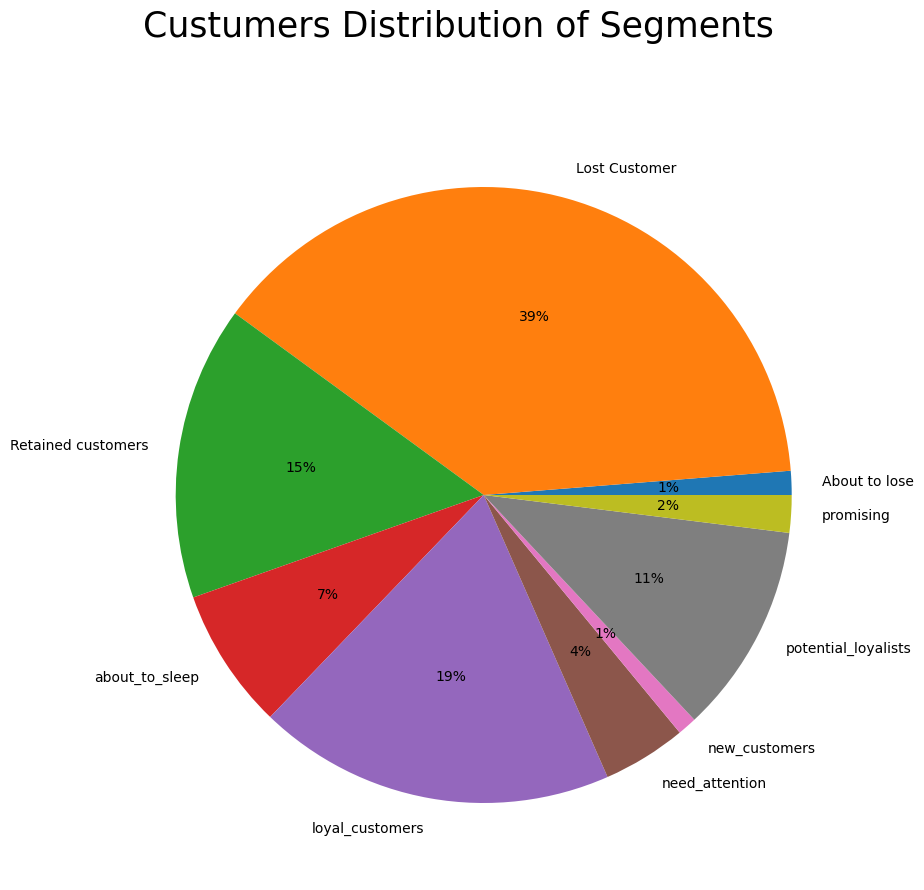

In [10]:
fig  = plt.figure(figsize = (20,10)).suptitle('Custumers Distribution of Segments', fontsize=25)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

# CLUSTERING

In [11]:
df_clustering = customerseg.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : 'nunique',
                                     'Sales' : 'sum'})

df_clustering.columns = ['recency', 'frequency', 'monetary']

In [12]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled,columns=['recency', 'frequency', 'monetary'])
df_scaled["CustomerID"] = df_clustering.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

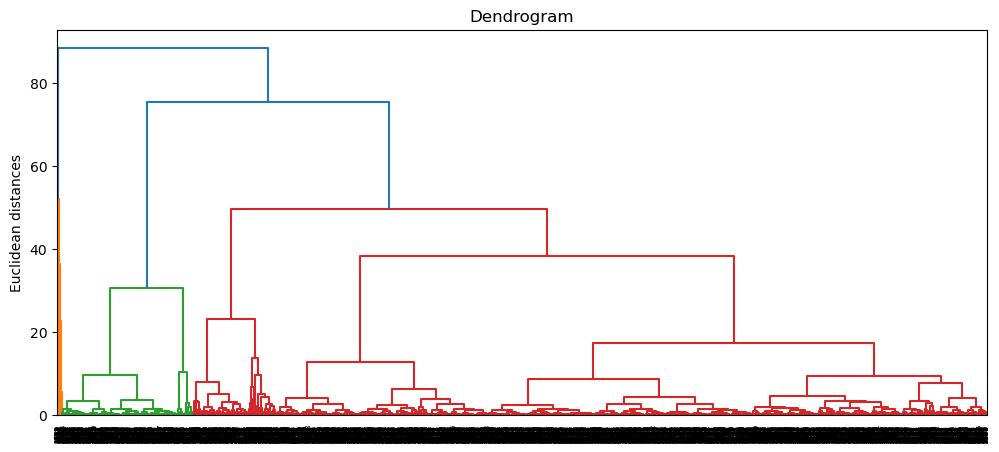

In [13]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()  

In [14]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=1)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,recency,frequency,monetary
0,-0.482745,0.066390,-0.007132
1,1.399839,-0.369344,-0.178418
2,-0.802140,8.759567,9.726631


In [15]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [16]:
df_kmeans = df_clustering.copy()
df_kmeans['labels'] = df_labels['labels'].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


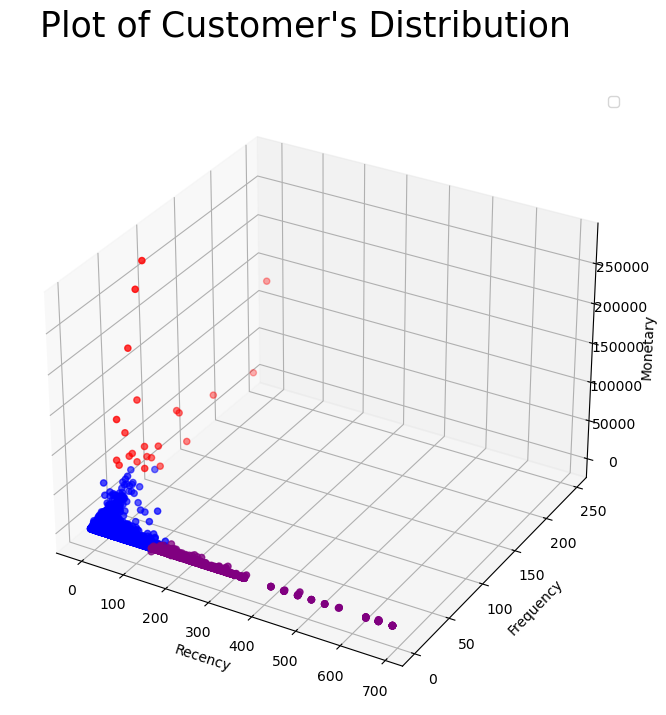

In [20]:
colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (10,8)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(df_kmeans["recency"], df_kmeans["frequency"], df_kmeans["monetary"], marker='o', c=colors[df_kmeans["labels"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

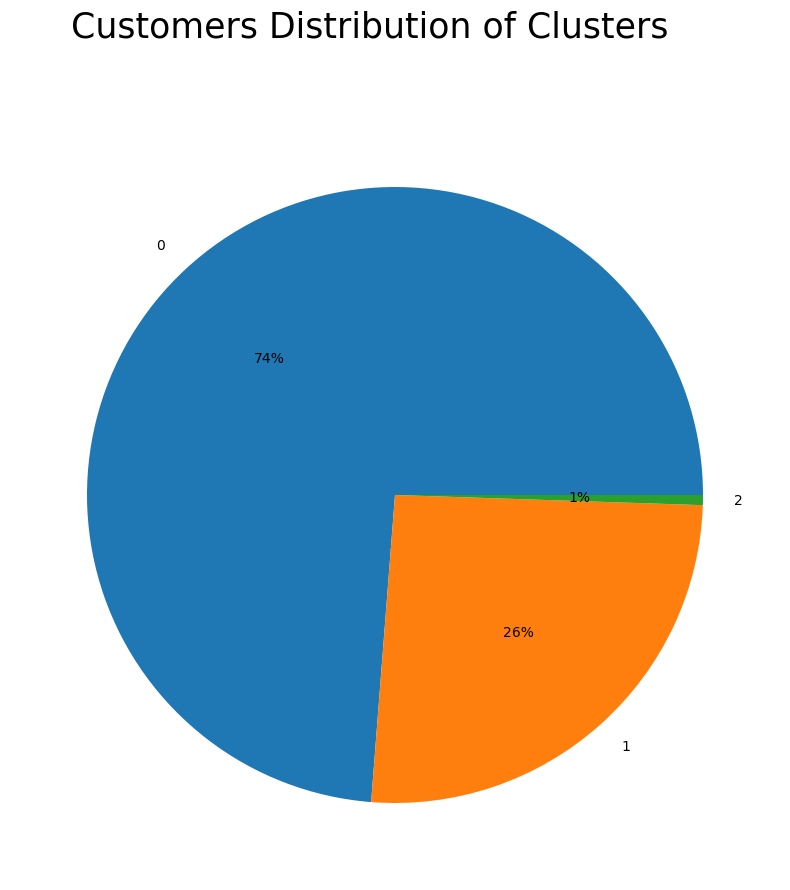

In [18]:
df_kmeans = df_kmeans.reset_index()
clusters_count = df_kmeans.groupby("labels").agg({"CustomerID": "count"})
clusters_count.reset_index(inplace=True)
clusters_count.columns = ['cluster', 'count']

fig  = plt.figure(figsize = (20,10)).suptitle('Customers Distribution of Clusters', fontsize=25)
plt.pie(clusters_count["count"], labels = clusters_count["cluster"], autopct='%.0f%%')

plt.show()